# Metalabeling Process

The machine learning model (or secondary model) will learn how to use the primary model, as it now sees the dataset (with the corresponding features) and the profits of the primary model. Therefore, it will learn that for certain values, the primary model makes a profit, and for other values, the primary model incurs a loss. As a result, it will learn to optimize the usage of the primary model.

In [1]:
import pandas as pd
import numpy as np

# read trading system 
trading_system = pd.read_csv("./Data_Crypto/trading_system_exportDC.csv", index_col='Unnamed: 0')
trading_system.head()

,open,high,low,close,volume,dayofweek,day,month,year,dayofyear,...,mp,mp_not_shifted,entry_price,number_of_stocks,open_operations,plot_entry_price,plot_sell_price,operations,closed_equity,open_equity
2015-08-02 00:00:00,281.53,281.63,279.74,279.75,178.145831,6,2,8,2015,214,...,NaN,0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0
2015-08-02 01:00:00,279.75,279.75,278.18,278.63,159.628930,6,2,8,2015,214,...,0.0,0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0
2015-08-02 02:00:00,278.66,280.73,278.65,280.56,124.514165,6,2,8,2015,214,...,0.0,0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0
2015-08-02 03:00:00,280.32,280.90,279.62,279.84,109.934748,6,2,8,2015,214,...,0.0,0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0
2015-08-02 04:00:00,279.90,280.31,278.19,278.65,159.883300,6,2,8,2015,214,...,0.0,0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0


In [2]:
# Subsetting the testing data
test = trading_system.loc[trading_system.mp_not_shifted==1,:"llv10"]
op = trading_system.open_operations.shift(-1)
test = test.loc[~test.index.duplicated(), :]
op = op.loc[~op.index.duplicated()]
test['open_operations'] = op

test.head()

,open,high,low,close,volume,dayofweek,day,month,year,dayofyear,quarter,hhv24,llv24,hhv10,llv10,open_operations
2015-08-03 06:00:00,281.08,282.68,280.97,282.67,151.615416,0,3,8,2015,215,3,282.68,278.43,282.68,280.27,38.913259
2015-08-03 07:00:00,282.68,284.40,282.67,283.78,102.812617,0,3,8,2015,215,3,284.40,278.43,284.40,280.27,56.247347
2015-08-03 08:00:00,283.78,284.31,283.75,284.27,64.050100,0,3,8,2015,215,3,284.40,278.43,284.40,280.27,37.851988
2015-08-03 09:00:00,284.30,284.39,283.75,283.75,45.061631,0,3,8,2015,215,3,284.40,278.80,284.40,280.27,29.715579
2015-08-03 10:00:00,283.75,283.75,283.42,283.52,53.429367,0,3,8,2015,215,3,284.40,278.96,284.40,280.27,33.253148


In [3]:
metalabeled_data = test
# Create base prediction
metalabeled_data['base_prediction'] = np.where(metalabeled_data.open_operations > 0, 1, 0)
# drop na
metalabeled_data.dropna(inplace=True)

print("Shape of data: ", metalabeled_data.shape)
print("Total with base pred equals 1: ", sum(metalabeled_data.base_prediction==1))
print("Total with base pred equals 0: ", sum(metalabeled_data.base_prediction==0))
print("")

Shape of data:  (22891, 17)
Total with base pred equals 1:  16615
Total with base pred equals 0:  6276



In [4]:
##### Adding Features for ML model

# Low, High, Mean of 5,10,20,50 values
metalabeled_data['low5'] = metalabeled_data.low.rolling(5).min()
metalabeled_data['low10'] = metalabeled_data.low.rolling(10).min()
metalabeled_data['low20'] = metalabeled_data.low.rolling(20).min()
metalabeled_data['low50'] = metalabeled_data.low.rolling(50).min()

metalabeled_data['high5'] = metalabeled_data.high.rolling(5).max()
metalabeled_data['high10'] = metalabeled_data.high.rolling(10).max()
metalabeled_data['high20'] = metalabeled_data.high.rolling(20).max()
metalabeled_data['high50'] = metalabeled_data.high.rolling(50).max()

metalabeled_data['mean5'] = metalabeled_data.close.rolling(5).mean()
metalabeled_data['mean10'] = metalabeled_data.close.rolling(10).mean()
metalabeled_data['mean20'] = metalabeled_data.close.rolling(20).mean()
metalabeled_data['mean50'] = metalabeled_data.close.rolling(50).mean()

metalabeled_data['volume5'] = metalabeled_data.volume.rolling(5).mean()
metalabeled_data['volume10'] = metalabeled_data.volume.rolling(10).mean()
metalabeled_data['volume20'] = metalabeled_data.volume.rolling(20).mean()
metalabeled_data['volume50'] = metalabeled_data.volume.rolling(50).mean()

# past two values of open, high, close
metalabeled_data["old1_open"] = metalabeled_data.open.shift(1)
metalabeled_data["old2_open"] = metalabeled_data.open.shift(2)

metalabeled_data["old1_high"] = metalabeled_data.high.shift(1)
metalabeled_data["old2_high"] = metalabeled_data.high.shift(2)

metalabeled_data["old1_close"] = metalabeled_data.close.shift(1)
metalabeled_data["old2_close"] = metalabeled_data.close.shift(2)

# Set of features
print(metalabeled_data.columns)
metalabeled_data.head()

Index(['open', 'high', 'low', 'close', 'volume', 'dayofweek', 'day', 'month',
       'year', 'dayofyear', 'quarter', 'hhv24', 'llv24', 'hhv10', 'llv10',
       'open_operations', 'base_prediction', 'low5', 'low10', 'low20', 'low50',
       'high5', 'high10', 'high20', 'high50', 'mean5', 'mean10', 'mean20',
       'mean50', 'volume5', 'volume10', 'volume20', 'volume50', 'old1_open',
       'old2_open', 'old1_high', 'old2_high', 'old1_close', 'old2_close'],
      dtype='object')


,open,high,low,close,volume,dayofweek,day,month,year,dayofyear,...,volume5,volume10,volume20,volume50,old1_open,old2_open,old1_high,old2_high,old1_close,old2_close
2015-08-03 06:00:00,281.08,282.68,280.97,282.67,151.615416,0,3,8,2015,215,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-03 07:00:00,282.68,284.40,282.67,283.78,102.812617,0,3,8,2015,215,...,NaN,NaN,NaN,NaN,281.08,NaN,282.68,NaN,282.67,NaN
2015-08-03 08:00:00,283.78,284.31,283.75,284.27,64.050100,0,3,8,2015,215,...,NaN,NaN,NaN,NaN,282.68,281.08,284.40,282.68,283.78,282.67
2015-08-03 09:00:00,284.30,284.39,283.75,283.75,45.061631,0,3,8,2015,215,...,NaN,NaN,NaN,NaN,283.78,282.68,284.31,284.40,284.27,283.78
2015-08-03 10:00:00,283.75,283.75,283.42,283.52,53.429367,0,3,8,2015,215,...,83.393826,NaN,NaN,NaN,284.30,283.78,284.39,284.31,283.75,284.27


In [5]:
# Drop NaN
print(metalabeled_data.shape)
metalabeled_data = metalabeled_data.dropna()
print(metalabeled_data.shape)

(22891, 39)
(22842, 39)


# Gradient Boosting

In [6]:
from numpy import mean
from numpy import std
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [7]:
# Save the index for test data
index_meta_pred = metalabeled_data.loc["2020-01-02":, :].index
index_meta_pred.shape

(8379,)

In [8]:
# split into input (X) and output (Y) training and test variables
X = metalabeled_data.loc[:"2019-12-31", metalabeled_data.columns != "base_prediction"].values # train fino a fine 2019
y = metalabeled_data.loc[:"2019-12-31", metalabeled_data.columns == "base_prediction"].values # train fino a fine 2019

X_test = metalabeled_data.loc["2020-01-02":, metalabeled_data.columns != "base_prediction"].values # test successivo da 2020 in poi
y_test  = metalabeled_data.loc["2020-01-02":, metalabeled_data.columns == "base_prediction"].values # test successivo da 2020 in poi

# scalar transformation 
scalar = StandardScaler()
scalar.fit(X)

# summarize the dataset
print("Training dataset: ", X.shape, y.shape)
print("Total in training with base pred equals 1: ", sum(y==1))
print("Total in training with base pred equals 0: ", sum(y==0))

print("")
print("Test dataset: ", X_test.shape, y_test.shape)
print("Total in test with base pred equals 1: ", sum(y_test==1))
print("Total in test with base pred equals 0: ", sum(y_test==0))

Training dataset:  (14463, 38) (14463, 1)
Total in training with base pred equals 1:  [10518]
Total in training with base pred equals 0:  [3945]

Test dataset:  (8379, 38) (8379, 1)
Total in test with base pred equals 1:  [6076]
Total in test with base pred equals 0:  [2303]


In [ ]:
# define the model with default parameters
model = GradientBoostingClassifier()
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(model, scalar.transform(X), y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean scores: %.3f standard error (%.3f)' % (mean(n_scores), std(n_scores)))

## Grid Search hyperparameters

In [ ]:
#### Define the grid of values to search
grid = dict()

# n_estimators = the number of boosting stages to perform
grid['n_estimators'] = [10, 20, 100]
# learning_rate = shrinks the contribution of each tree by learning_rate
grid['learning_rate'] = [0.6, 1.0] 
# subsample = the fraction of samples to be used for fitting the individual base learners 
# ( If smaller than 1.0 this results in Stochastic Gradient Boosting)
grid['subsample'] = [0.9, 1.0]
# max_depth = the maximum depth of the individual regression estimators
# (The maximum depth limits the number of nodes in the tree)
grid['max_depth'] = [10, 15, 25]

# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=2, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search (Run fit with all sets of parameters)
grid_result = grid_search.fit(scalar.transform(X), y)

# summarize the best score and configuration
# best_score_ = Mean cross-validated score of the best_estimator
# best_params_ = Parameter setting that gave the best results
print("Best accuracy: %f with params %s" % (grid_result.best_score_, grid_result.best_params_))

In [ ]:
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score'] 
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean scores: %f standard dev: (%f) with params: %r" % (mean, stdev, param))

In [12]:
# Prediction for X_test with the best model and parameters founded with GRIDSEARCHCV
metalabeled_pred = grid_result.predict(scalar.transform(X_test))

print("Predicted 0: ", sum(metalabeled_pred==0))
print("Predicted 1: ", sum(metalabeled_pred==1))
print("Total predicted: ", len(X_test))

Predicted 0:  2303
Predicted 1:  6076
Total predicted:  8379


In [13]:
# Create a dataframe with the meta prediction
meta_data = pd.DataFrame(metalabeled_pred, columns = ['meta_pred'], index = index_meta_pred)
meta_data

,meta_pred
2020-01-03 04:00:00,1
2020-01-03 05:00:00,0
2020-01-03 06:00:00,0
2020-01-03 07:00:00,1
2020-01-03 08:00:00,1
...,...
2022-07-24 21:00:00,0
2022-07-24 22:00:00,0
2022-07-24 23:00:00,0
2022-07-25 00:00:00,0


In [14]:
# merge the meta prediction with the trading system data
metalabeled_trading_system = trading_system.loc["2020-01-02":, :].rename(columns={"mp": "old_mp"})
metalabeled_trading_system = metalabeled_trading_system.loc[~metalabeled_trading_system.index.duplicated(), :]
meta_data = meta_data.loc[~meta_data.index.duplicated(), :]
metalabeled_trading_system["meta_pred"] =  meta_data.meta_pred

In [15]:
def marketposition_generator(enter_rules, exit_rules, meta_pred):    
    # mp = market position, equals 1 when trading, 0 otherwise
    # status=1 trading status
    # status=0 otherwise
    status = 0 
    mp = [] # list of market positions
    for (i, j, z) in zip(enter_rules, exit_rules, meta_pred):
        if status == 0:  # BUY RULE 
            if (i == 1 and j != -1) and z == 1:
                status = 1
        else:           # SELL RULE
            if j == -1 :
                status = 0
                
        mp.append(status)
    
    service_dataframe = pd.DataFrame(mp, columns=['mp'], index=enter_rules.index)

    # Delay by one record as the operation will atually start the next bar
    service_dataframe.mp = service_dataframe.mp.shift(1) 
    # start with zero instead of NaN
    service_dataframe.iloc[0,0] = 0
    return service_dataframe.mp

# Generate the market position
metalabeled_trading_system["mp"] = marketposition_generator( metalabeled_trading_system['enter_rules'], metalabeled_trading_system['exit_rules'], metalabeled_trading_system["meta_pred"] )   

In [17]:
COSTS = 0 # cost of operations
OPERATION_MONEY = 10000 # Operation money for single trade (same as AAPL system)



# entry price 
metalabeled_trading_system["entry_price"] = np.where((metalabeled_trading_system.mp.shift(1) == 0) & 
                                        (metalabeled_trading_system.mp == 1), metalabeled_trading_system.open, np.nan)
# number of stockes purchased
metalabeled_trading_system["number_of_stocks"] = np.where((metalabeled_trading_system.mp.shift(1) == 0) & 
                                    (metalabeled_trading_system.mp == 1), OPERATION_MONEY / metalabeled_trading_system.open, np.nan) 
# fill with entry price
# ffill=forward-fill propagates the last observed non-null value forward until another non-null value is encountered
metalabeled_trading_system["entry_price"] = metalabeled_trading_system["entry_price"].fillna(method='ffill')
# fill number of stockes purchased
metalabeled_trading_system["number_of_stocks"] = metalabeled_trading_system["number_of_stocks"].fillna(method='ffill')    
# open operations=instant trade gain / loss (when mp=1),
#                 0 otherwise               (when mp=0)
metalabeled_trading_system["open_operations"] = (metalabeled_trading_system.close - metalabeled_trading_system.entry_price) * metalabeled_trading_system.number_of_stocks
# At the exit of the trade: total gain/loss * number of stokes - transaction costs
metalabeled_trading_system["open_operations"] = np.where((metalabeled_trading_system.mp == 1) & (metalabeled_trading_system.mp.shift(-1) == 0), 
        (metalabeled_trading_system.open.shift(-1) - metalabeled_trading_system.entry_price) * metalabeled_trading_system.number_of_stocks - 2 * COSTS,
         metalabeled_trading_system.open_operations)
# entry price for plotting
metalabeled_trading_system["plot_entry_price"] = np.where((metalabeled_trading_system.mp.shift(1) == 0) & 
                                    (metalabeled_trading_system.mp == 1), metalabeled_trading_system.open, np.nan)
# sell price for plotting
metalabeled_trading_system["plot_sell_price"] = np.where((metalabeled_trading_system.mp == 1) & (metalabeled_trading_system.mp.shift(-1) == 0), 
        metalabeled_trading_system.open.shift(-1), np.nan)
# Put 0 when not trading  
metalabeled_trading_system["open_operations"] = np.where(metalabeled_trading_system.mp == 1, metalabeled_trading_system.open_operations, 0) 
# operations = trade gain/loss of only all closed trades (support field)
metalabeled_trading_system["operations"] = np.where((metalabeled_trading_system.mp.shift(-1) == 0) & (metalabeled_trading_system.mp == 1), metalabeled_trading_system.open_operations, np.nan)
# closed_equity = equity line (profit curve) with closed transactions only
# it does not take into account fluctuations during the trade
metalabeled_trading_system["closed_equity"] = metalabeled_trading_system.operations.fillna(0).cumsum()
# open equity = equity line (profit curve) with all trade
# it does take into account fluctuations during the trade
metalabeled_trading_system["open_equity"] = metalabeled_trading_system.closed_equity + \
                           metalabeled_trading_system.open_operations - metalabeled_trading_system.operations.fillna(0)

## Some Statistics 

In [18]:
# Total trade operations with metalab trading system
sum((metalabeled_trading_system.mp == 1) & (metalabeled_trading_system.mp.shift(-1) == 0) )

223

In [19]:
# Total trade operations without metalab trading system
sum((trading_system.loc["2020-01-02":, :].mp == 1) & (trading_system.loc["2020-01-02":, :].mp.shift(-1) == 0) )

297

In [20]:
# Final profit without metalabeling
print(round(trading_system.loc["2020-01-02":, :].open_equity[-1] - 
            trading_system.loc[:"2020-01-02", :].open_equity[-1],2)) 
print(round(trading_system.loc["2020-01-02":, :].closed_equity[-1]-
            trading_system.loc[:"2020-01-02", :].closed_equity[-1],2))

4549.99
4549.99


In [21]:
# Final profit with metalabeling
print(round(metalabeled_trading_system.open_equity[-1],2))  
print(round(metalabeled_trading_system.closed_equity[-1],2)) 

13834.62
13834.62


In [22]:
# Win-Loss Ratio
def percent_win(operations):
    return round((operations[operations > 0].count() / operations[operations < 0].count()),2)

print("Win-Loss Ratio without metalabing: ", percent_win(trading_system.loc["2020-01-02":, :].operations.dropna()))
print("Win-Loss Ratio with metalabing: ", percent_win(metalabeled_trading_system.operations.dropna()))

Win-Loss Ratio without metalabing:  0.56
Win-Loss Ratio with metalabing:  0.7


In [23]:
# Total profit operations
def total_profit_operations(operations):
    return operations[operations > 0].count()

print("Total profit operations without metalabing: ", total_profit_operations(trading_system.loc["2020-01-02":, :].operations.dropna()))
print("Total profit operations with metalabing: ", total_profit_operations(metalabeled_trading_system.operations.dropna()))

Total profit operations without metalabing:  107
Total profit operations with metalabing:  92


In [24]:
# Total loss operations
def total_loss_operations(operations):
    return operations[operations < 0].count()

print("Total loss operations without metalabing: ", total_loss_operations(trading_system.loc["2020-01-02":, :].operations.dropna()))
print("Total loss operations with metalabing: ", total_loss_operations(metalabeled_trading_system.operations.dropna()))

Total loss operations without metalabing:  190
Total loss operations with metalabing:  131


In [25]:
# Average  Profit 
def avg_profit(total_profit, num_operations):  
    return round( total_profit / num_operations,2)



avg_profit_trading_system = avg_profit( round(trading_system.loc["2020-01-02":, :].open_equity[-1] - 
                                         trading_system.loc[:"2019-12-31", :].open_equity[-1],2), 
                                            trading_system.loc["2020-01-02":, :].operations.dropna().count())

    
avg_profit_metalabeling_trading_system  = avg_profit( round(metalabeled_trading_system.open_equity[-1],2), 
                                                        metalabeled_trading_system.operations.dropna().count())
    
print("Average profit without metalabing: ", avg_profit_trading_system )
print("Average profit with metalabing: ", avg_profit_metalabeling_trading_system)

Average profit without metalabing:  15.32
Average profit with metalabing:  62.04


In [57]:
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

# Plot double Equity Line
def plot_double_equity(equity1, equity2, lab1, lab2):

    fig, ax = plt.subplots(figsize=(14, 8), dpi=300)
    ax.plot(equity1.index, equity1, color='red', label = lab1)
    ax.plot(equity2.index, equity2, color='blue', label = lab2)
    loc = plticker.MultipleLocator(base=4000.0) # this locator puts ticks at regular intervals
    ax.xaxis.set_major_locator(loc)
    
    plt.xlabel("Time")
    plt.ylabel("Profit/Loss")
    plt.title('Equity Line Bitcoin')
    plt.legend(loc=2, prop={'size': 15})
    plt.show()
    return

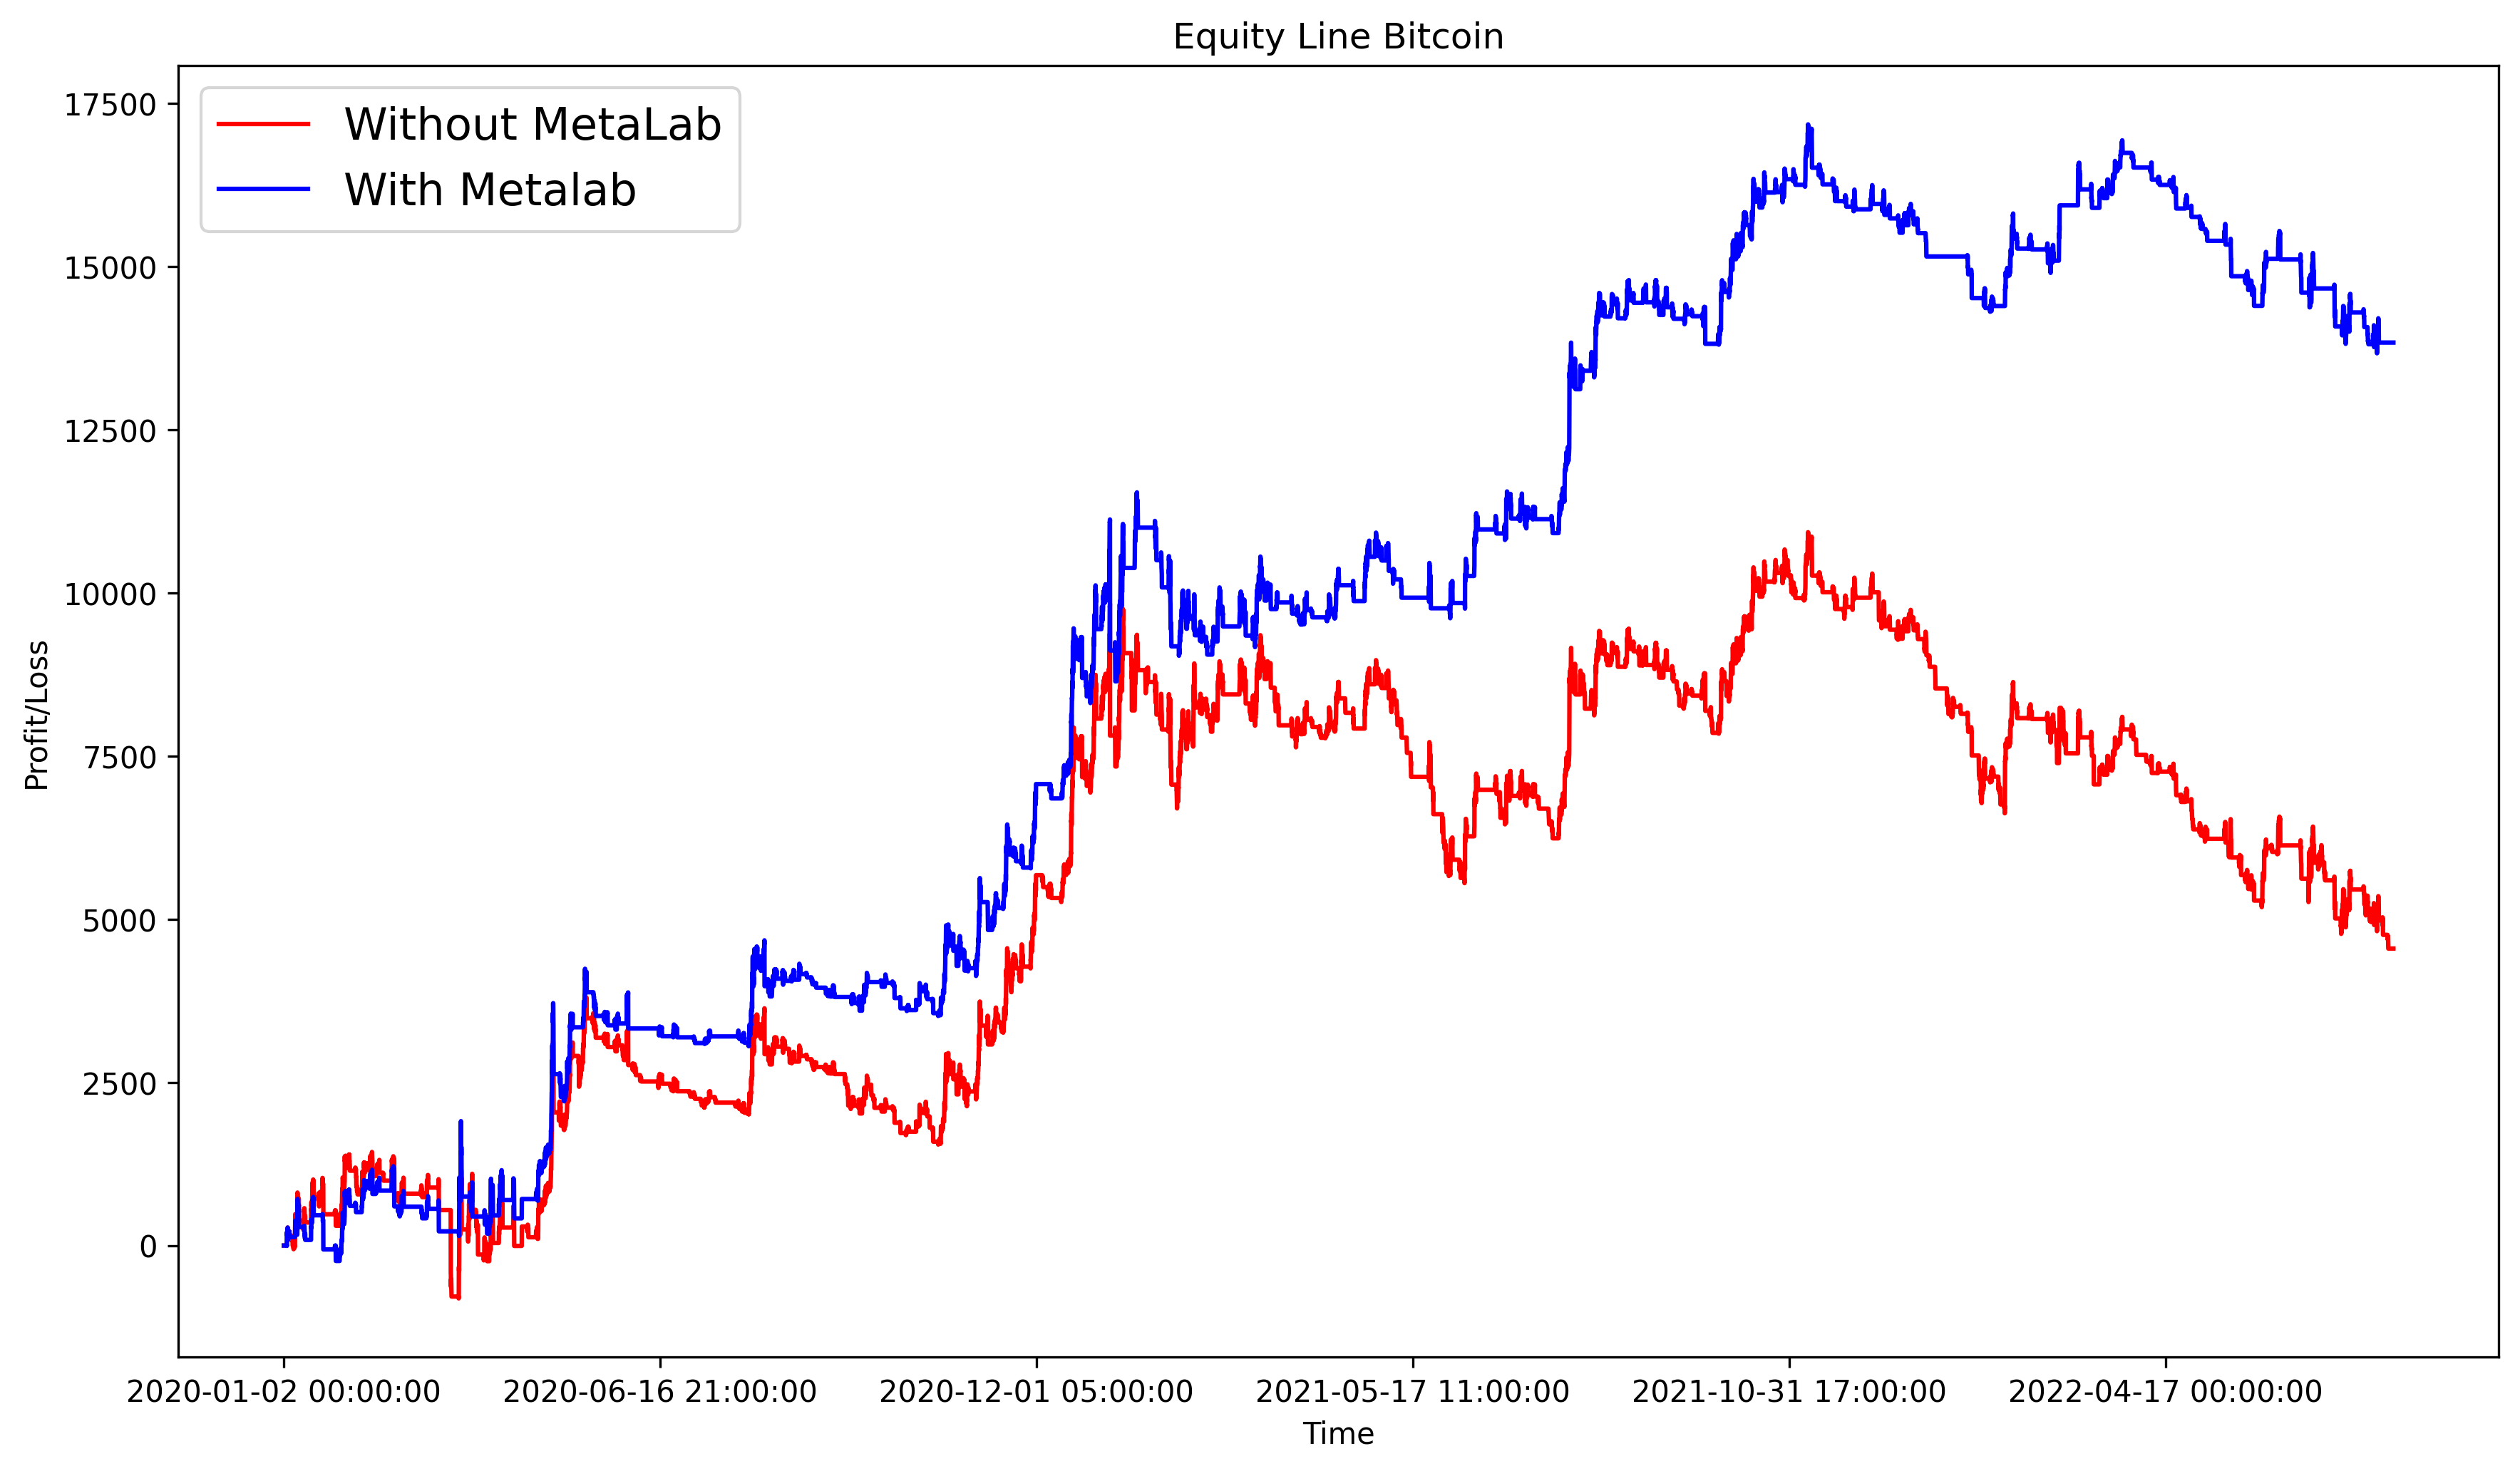

In [58]:
# Plot open equity = equity line with fluctuations during the trade
without_meta = trading_system.loc["2020-01-02":, :].open_equity - trading_system.loc[:"2020-01-02", :].open_equity[-1]
plot_double_equity(without_meta, metalabeled_trading_system.open_equity, "Without MetaLab", "With Metalab");

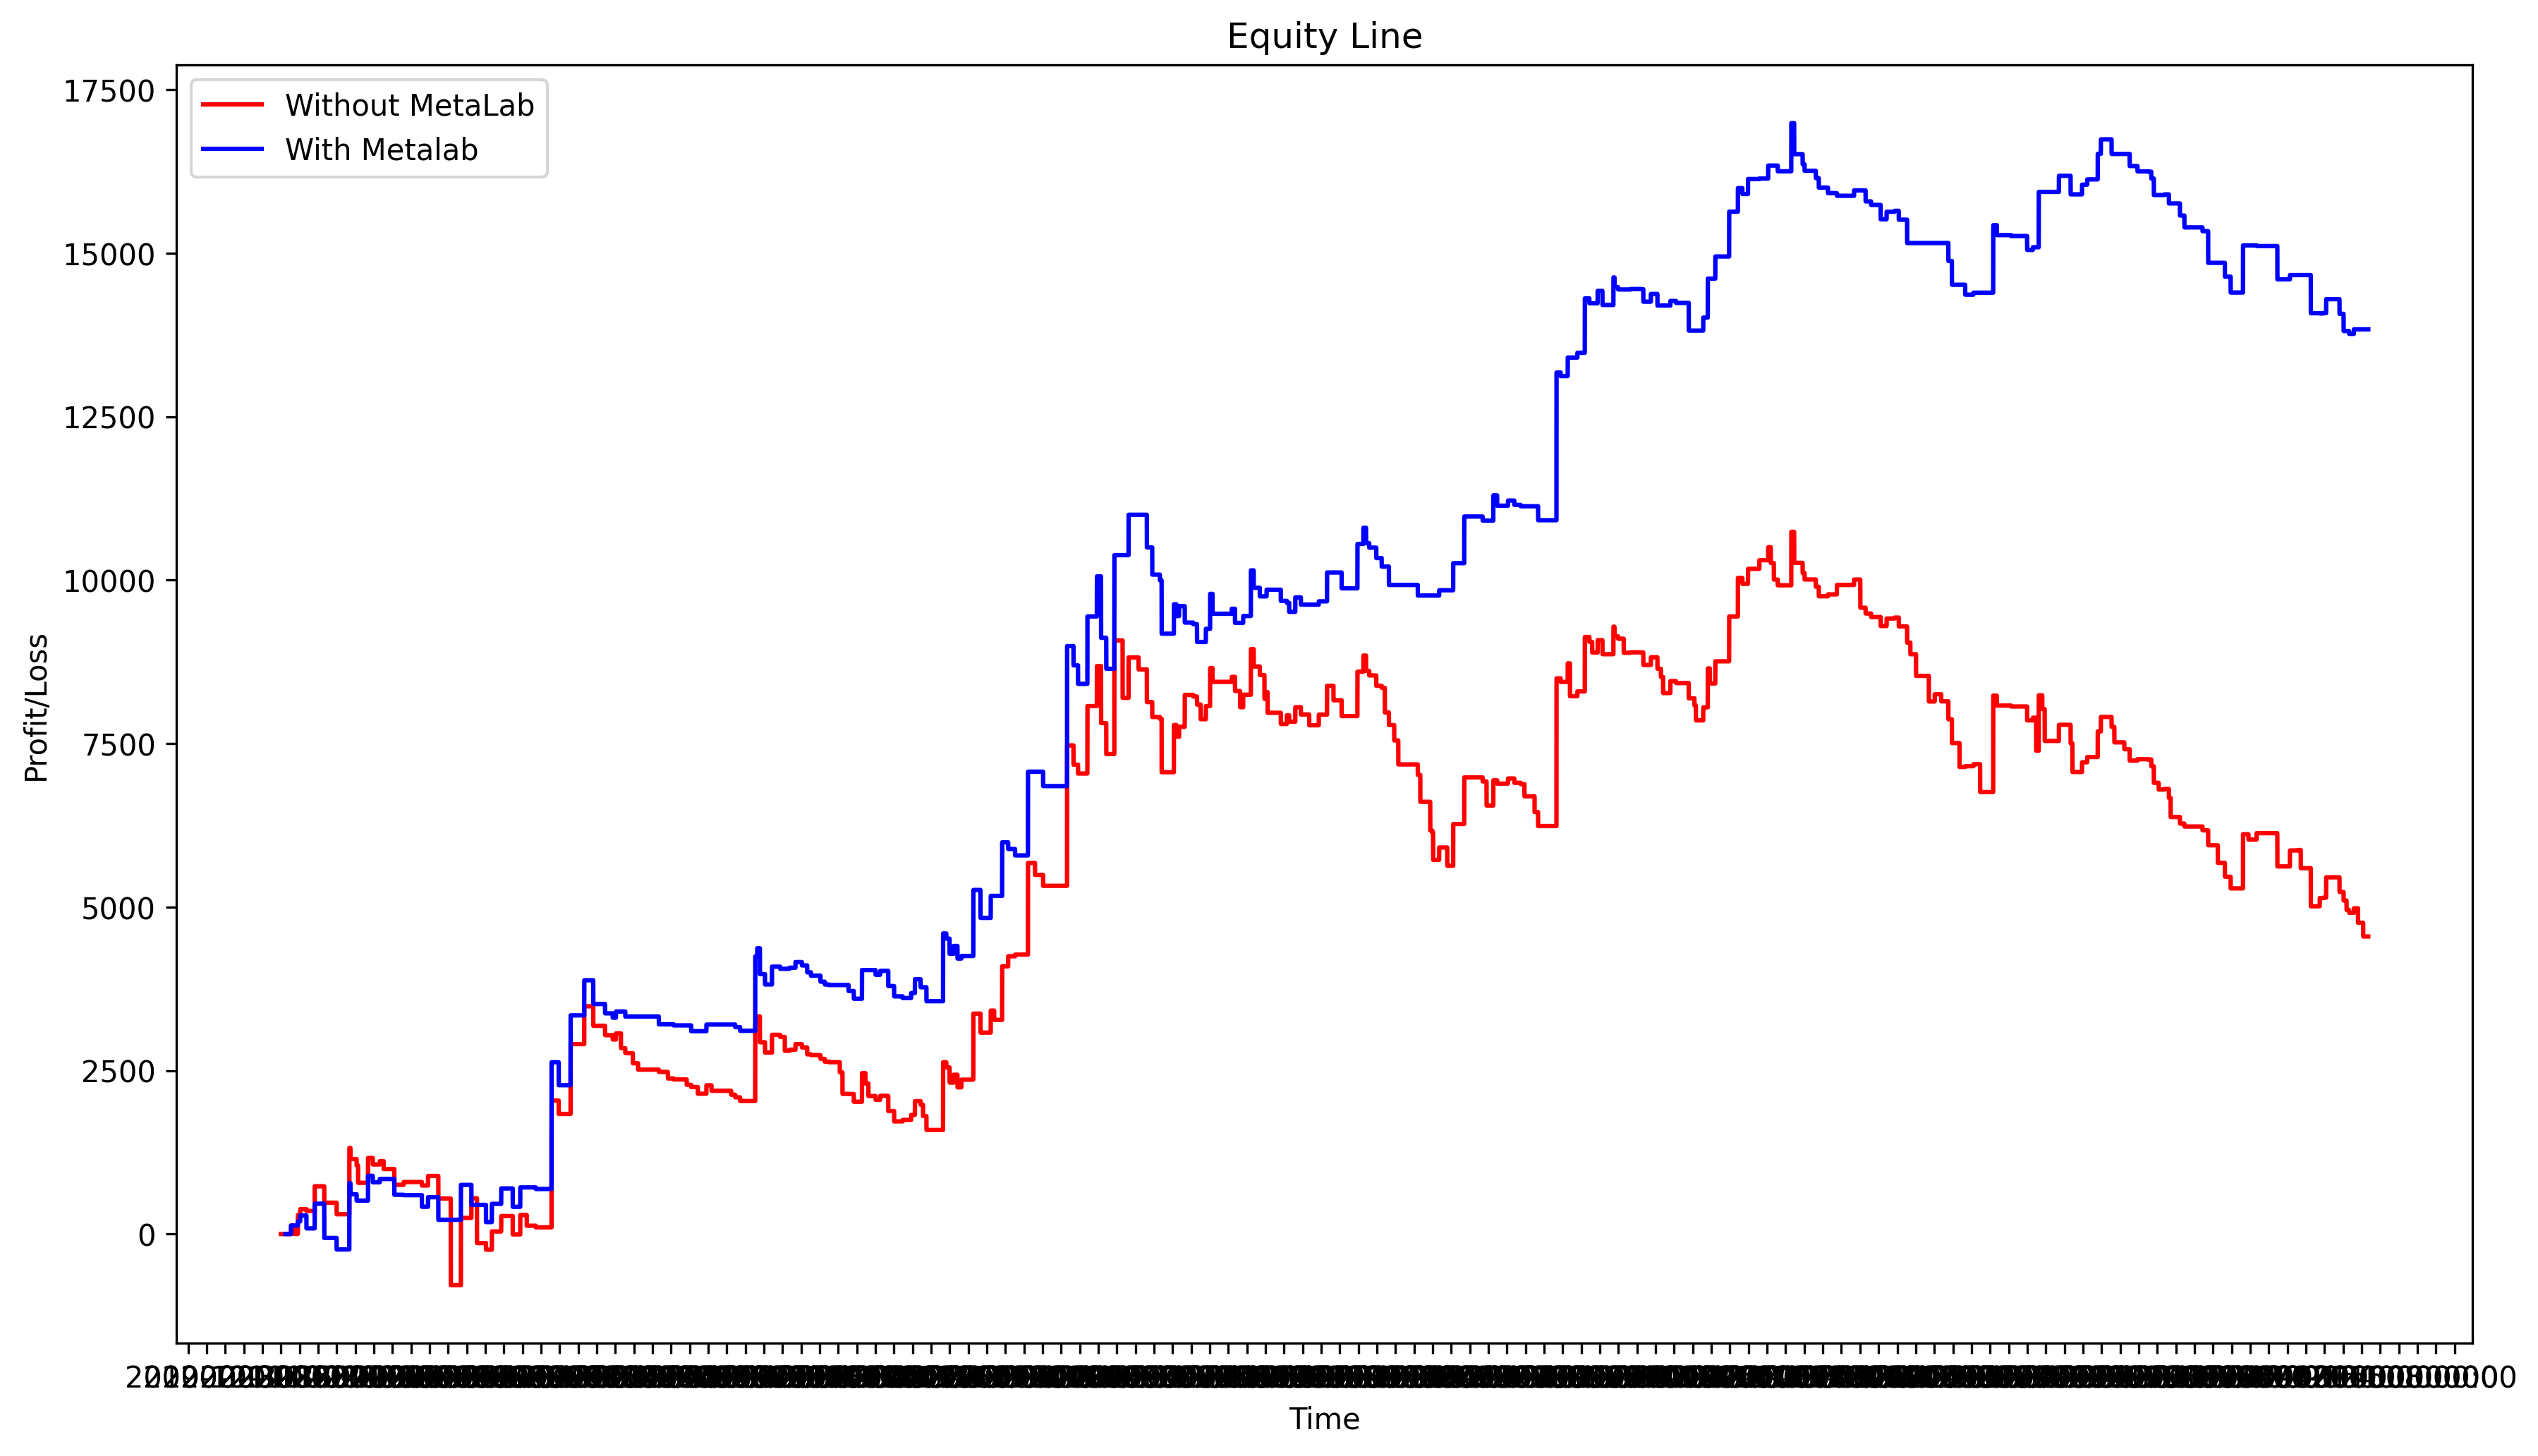

In [28]:
# Plot closed equity = equity line with not fluctuations during the trade
without_meta = trading_system.loc["2019-12-31":, :].closed_equity - trading_system.loc[:"2020-01-02", :].closed_equity[-1]
plot_double_equity(without_meta, metalabeled_trading_system.closed_equity, "Without MetaLab", "With Metalab");

In [61]:
# Drawdown = difference between the highest and lowest peak in a time interval
def drawdown(equity):
    # calculates the drawdown given an equity line
    maxvalue = equity.expanding(0).max() 
    drawdown = equity - maxvalue
    drawdown_series = pd.Series(drawdown, index = equity.index)
    return drawdown_series
# Plot double drawdown
def plot_double_drawdown(equity1, equity2, lab1, lab2):
    dd1 = drawdown(equity1)
    dd2 = drawdown(equity2)
    fig, ax = plt.subplots(figsize=(14, 8), dpi=300)
    ax.plot(equity1.index, dd1, color='red', label = lab1)
    ax.plot(equity2.index, dd2, color='blue', label = lab2)
    loc = plticker.MultipleLocator(base=4000.0) # this locator puts ticks at regular intervals
    ax.xaxis.set_major_locator(loc)
    plt.xlabel("Time")
    plt.ylabel("Profit/Loss")
    plt.title('Draw Down Bitcoin')
    plt.legend(loc=3, prop={'size': 15})
    plt.show()
    return

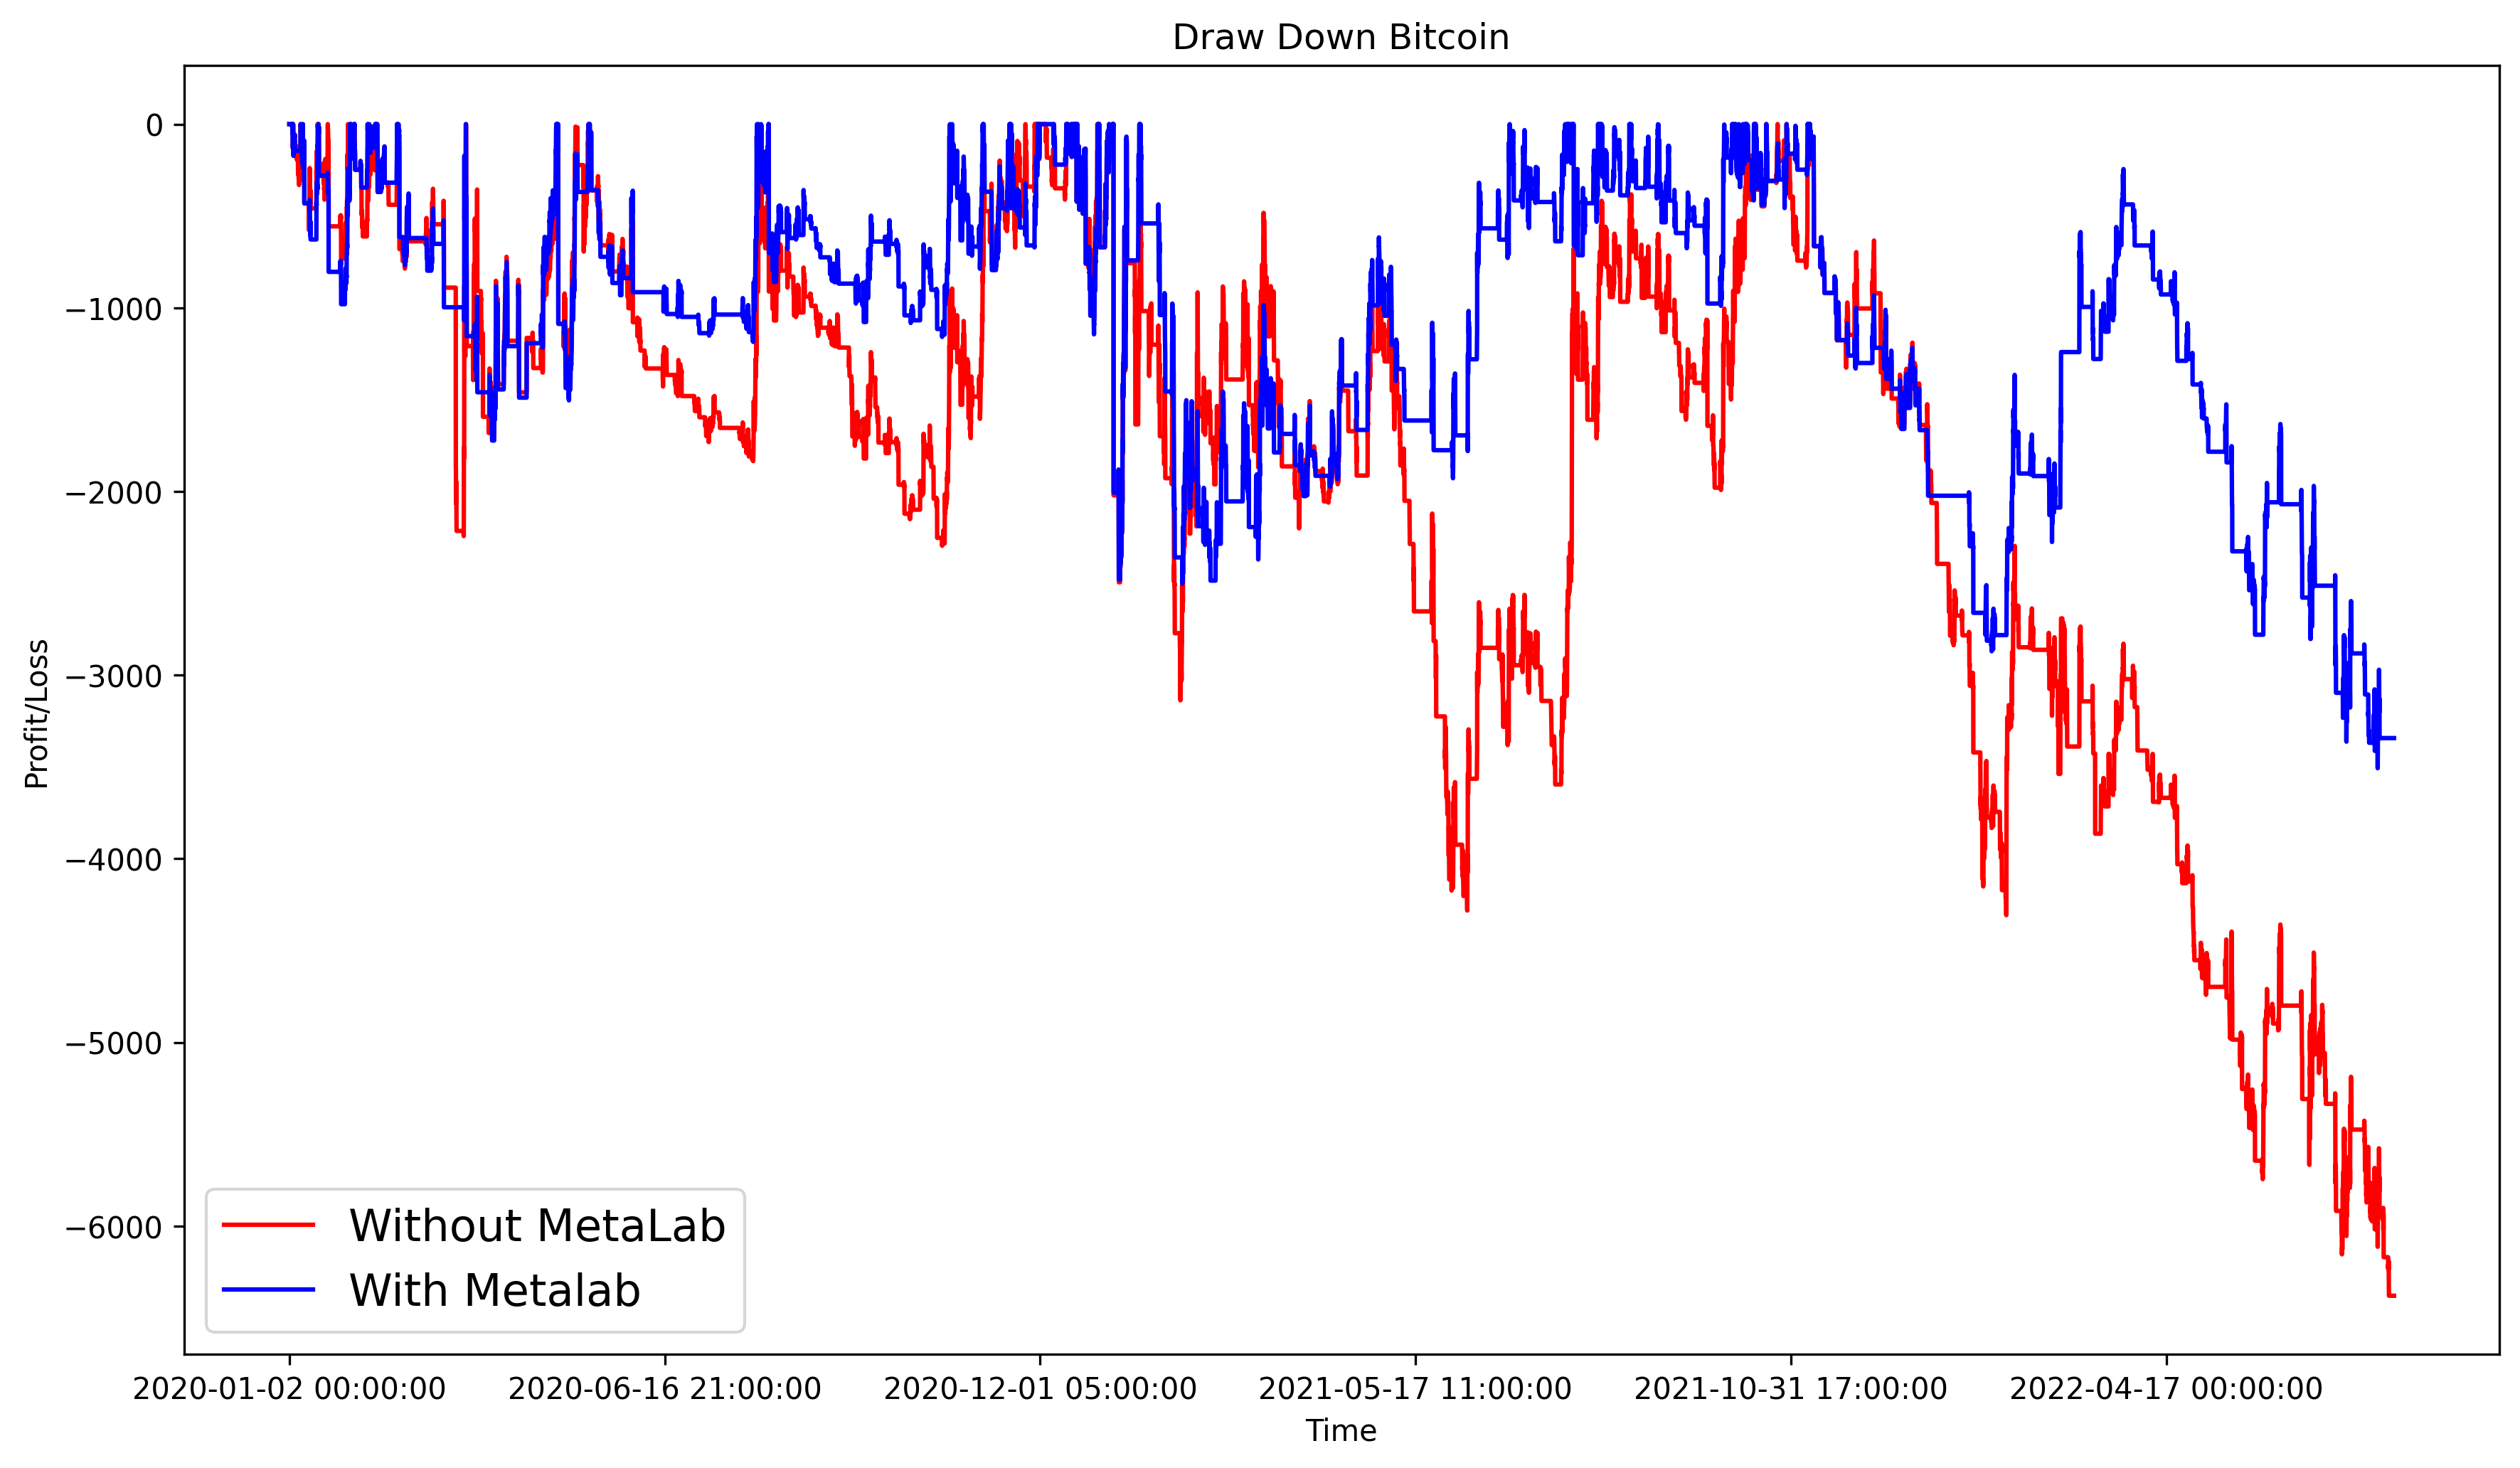

In [62]:
# Drawdown plot
without_meta = trading_system.loc["2020-01-02":, :].open_equity - trading_system.loc[:"2020-01-02", :].open_equity[-1]
plot_double_drawdown(without_meta, metalabeled_trading_system.open_equity, "Without MetaLab", "With Metalab")

In [31]:
# MAX drawdown
def max_draw_down(equity):
    dd = drawdown(equity)
    return round(dd.min(),2)

print("Max Dradown without metalabing: ",max_draw_down(trading_system.loc["2020-01-02":, :].open_equity))
print("Max Dradown with metalabing: ",max_draw_down(metalabeled_trading_system.open_equity))

Max Dradown without metalabing:  -6379.16
Max Dradown with metalabing:  -3506.84


In [32]:
# Average drawdown
def avgdrawdown_nozero(equity):
    dd = drawdown(equity)
    return round(dd[dd < 0].mean(),2)

print("Average Dradown without metalabing: ", avgdrawdown_nozero(trading_system.loc["2020-01-02":, :].open_equity))
print("Average Dradown with metalabing: ",avgdrawdown_nozero(metalabeled_trading_system.open_equity))

Average Dradown without metalabing:  -1935.0
Average Dradown with metalabing:  -1128.9


In [33]:
# Plot trading system (buys and sells) with bollinger bands
def plot_trading_system(data):
    plt.figure(figsize=(14, 8), dpi=300)
    buy_price = data['plot_entry_price']
    sell_price = data['plot_sell_price']
    
    data['close'].plot(label = 'CLOSE PRICES', alpha = 0.3)
    plt.scatter(data.index, buy_price, marker = '^', color = 'green', label = 'BUY', s = 200)
    plt.scatter(data.index, sell_price, marker = 'v', color = 'red', label = 'SELL', s = 200)
    plt.title('TRADE SIGNALS')
    plt.legend(loc = 'upper left')
    plt.show()

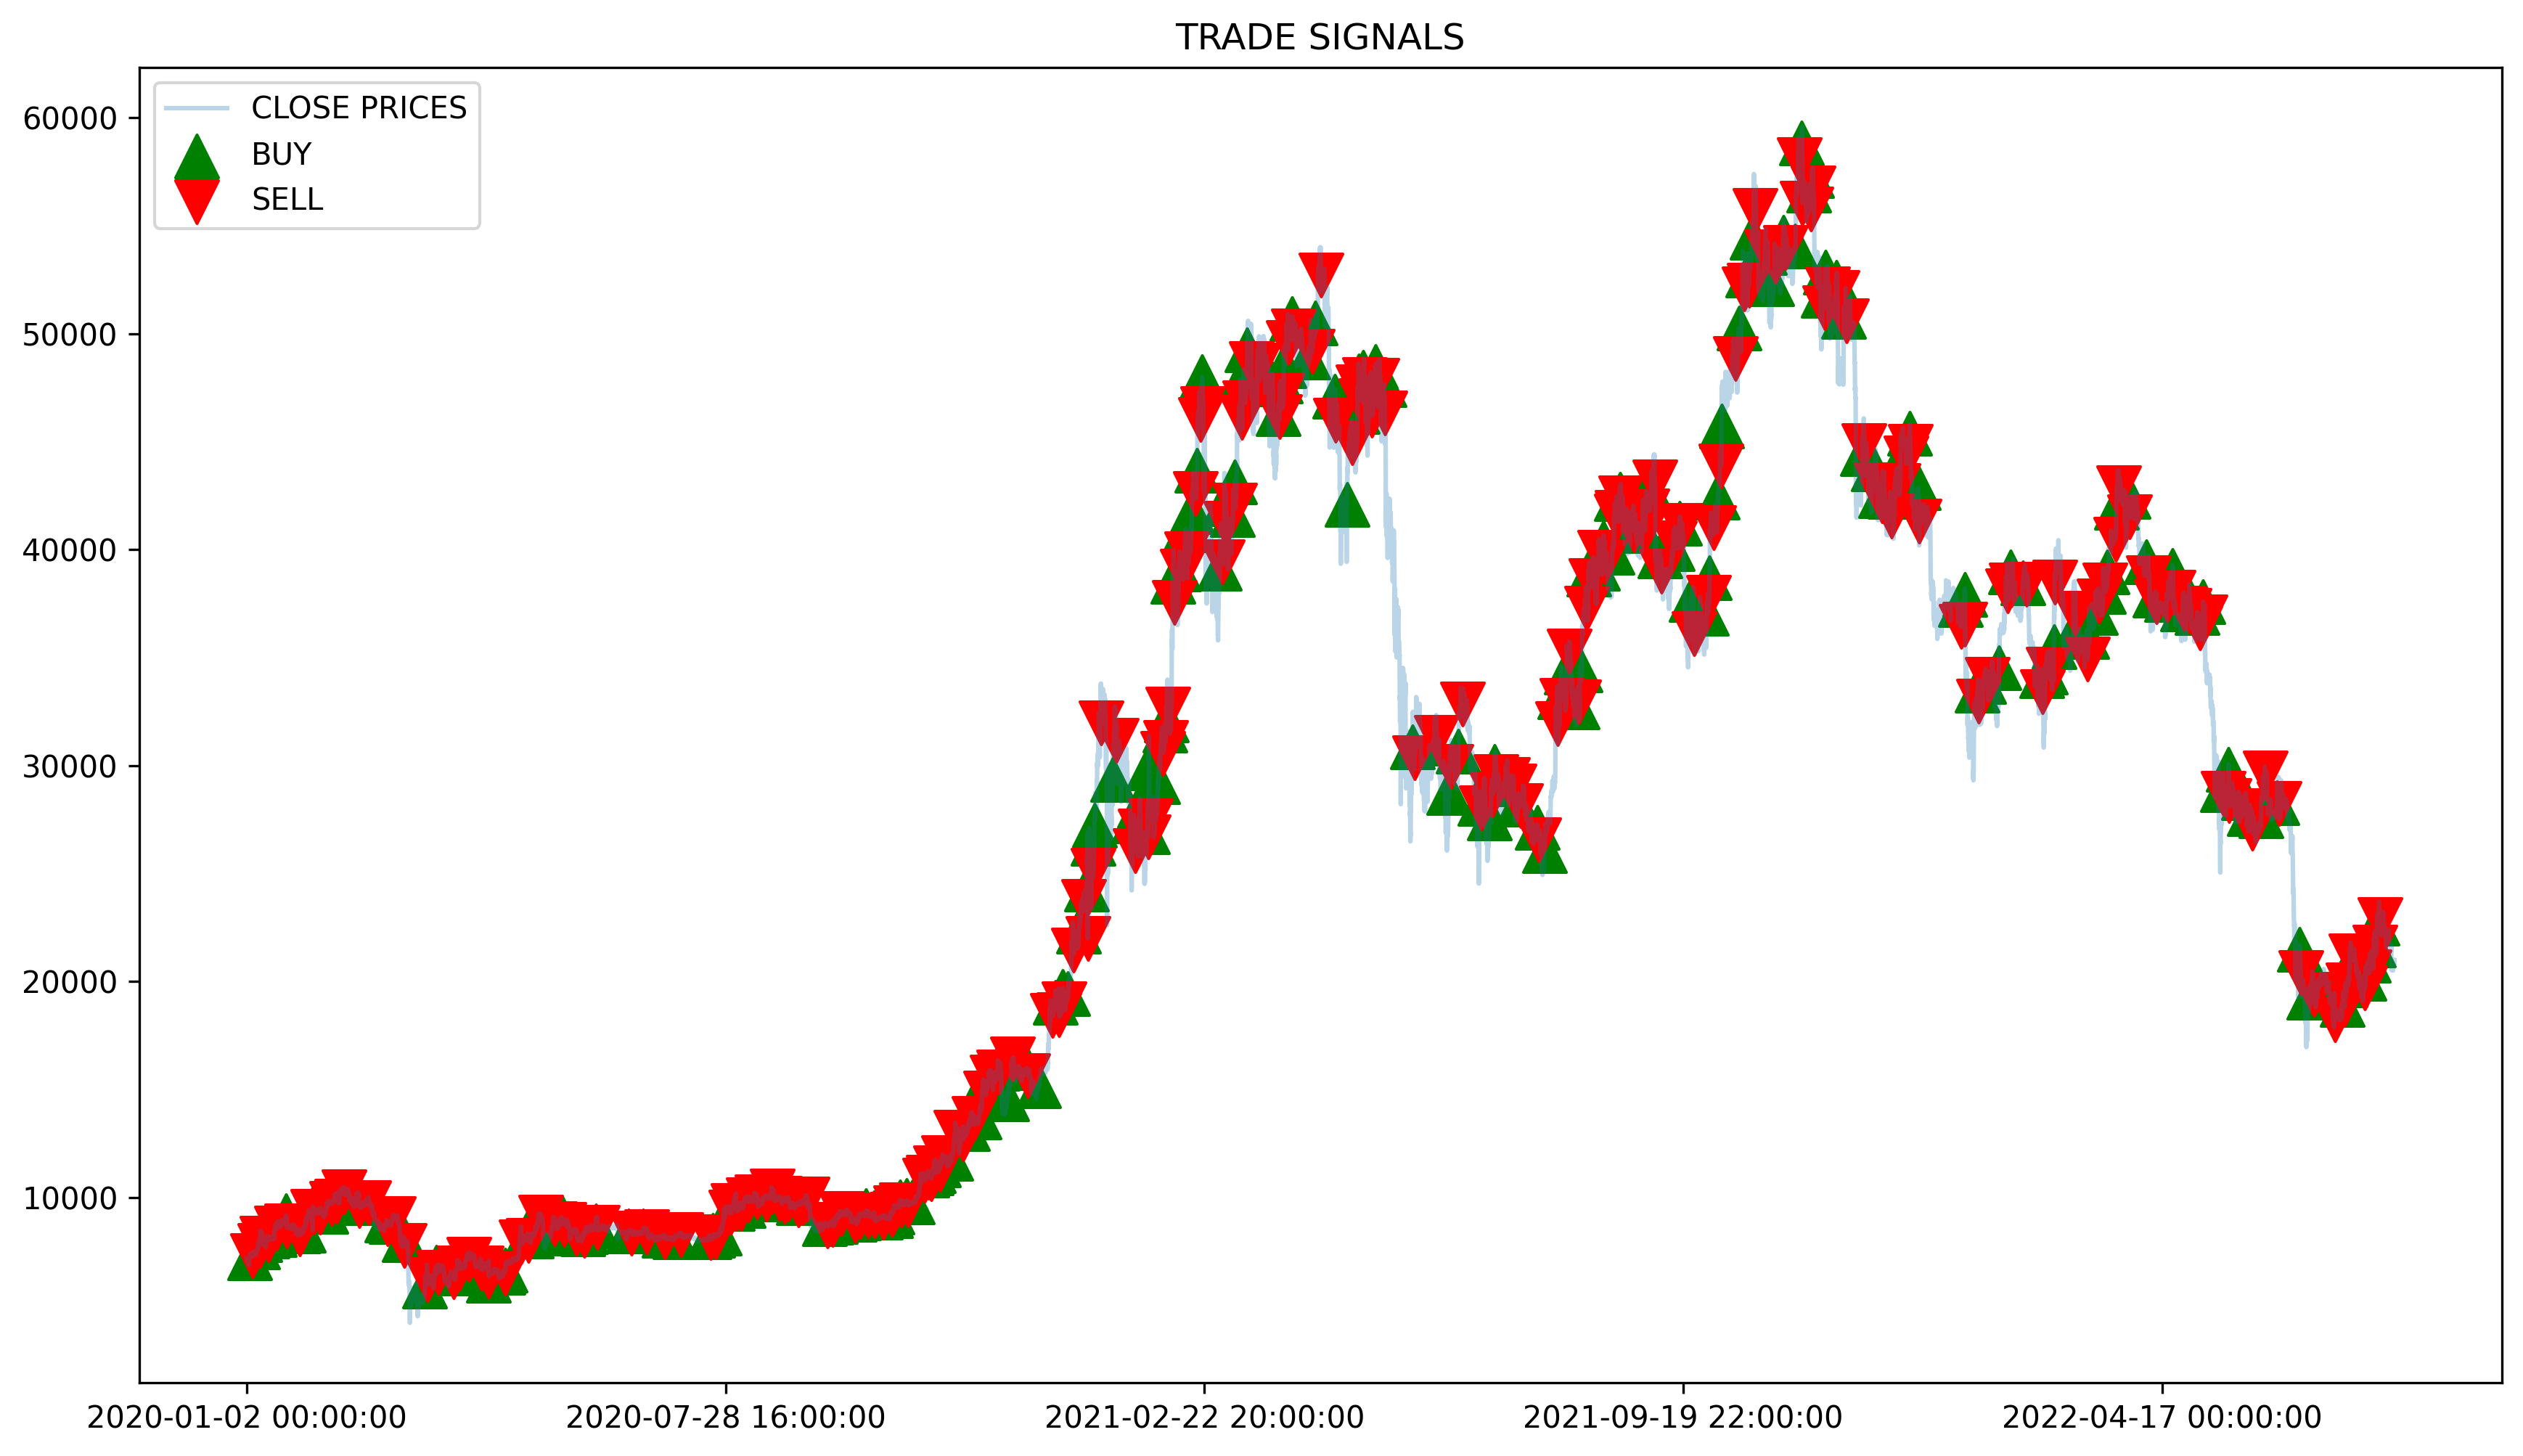

In [34]:
# plot trading system
plot_trading_system(metalabeled_trading_system)